# Step 1 — Setup & Safe Types

In [1]:
import os
import pandas as pd
from pandasai import SmartDataframe
from pandasai.llm.openai import OpenAI

# Set your OpenAI API key
# os.environ["OPENAI_API_KEY"] = "sk-your_api_key_here"

# Load full HR dataset
df = pd.read_csv("../Messy-dataset/cleaned_messy_HR_data.csv")

# 1️⃣ Ensure numeric columns are numeric
numeric_cols = ['Age', 'Salary', 'Performance Score']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing numeric values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
df['Performance Score'] = df['Performance Score'].fillna(df['Performance Score'].median())

# 2️⃣ Convert categorical columns to string
cat_cols = ['Gender', 'Department', 'Position']
for col in cat_cols:
    df[col] = df[col].astype(str)

# 3️⃣ Convert dates to string
df['Joining Date'] = df['Joining Date'].astype(str)


# Step 2 — Chunking for Safe AI Interaction

- For large datasets, we don’t send the full DataFrame at once.

- Split it into manageable chunks (e.g., 500 rows):

In [2]:
chunk_size = 500
chunks = [df[i:i+chunk_size] for i in range(0, len(df), chunk_size)]

# Step 3 — Initialize PandasAI

In [4]:
# os.environ["OPENAI_API_KEY"]=

In [5]:
llm = OpenAI(api_token=os.environ["OPENAI_API_KEY"])

# Step 4 — Function to Summarize Each Chunk

In [8]:
def summarize_chunk(df_chunk):
    sdf = SmartDataframe(df_chunk, config={"llm": llm, "enable_cache": False})
    summary = sdf.chat("""
    Summarize the dataset:
    - Count missing values per column
    - Average Salary by Department
    - Average Performance Score by Gender
    """)
    return summary


# Step 5 — Process All Chunks
- Each chunk is summarized separately, avoiding recursion errors.
- You get chunk-level summaries.

Processing chunk 1/2 ...


Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/pipelines/chat/code_execution.py", line 113, in execute
    raise e
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/pipelines/chat/code_execution.py", line 96, in execute
    if not OutputValidator.validate_result(result):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/helpers/output_validator.py", line 73, in validate_result
    raise InvalidOutputValueMismatch(
pandasai.exceptions.Inv

Processing chunk 2/2 ...


Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/pipelines/chat/code_execution.py", line 113, in execute
    raise e
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/pipelines/chat/code_execution.py", line 97, in execute
    raise InvalidOutputValueMismatch(
pandasai.exceptions.InvalidOutputValueMismatch: Value type <class 'dict'> must match with type summary


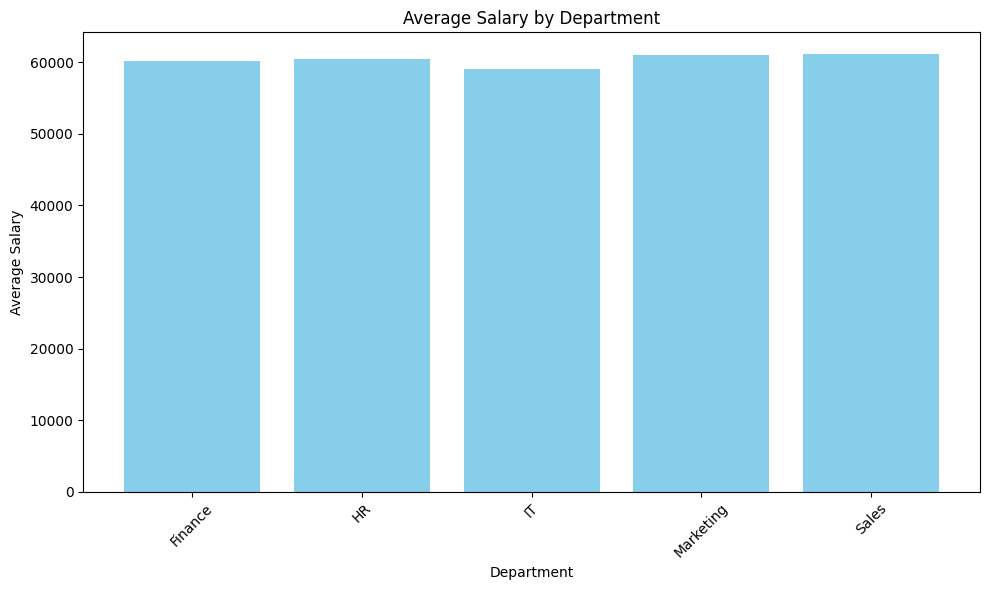

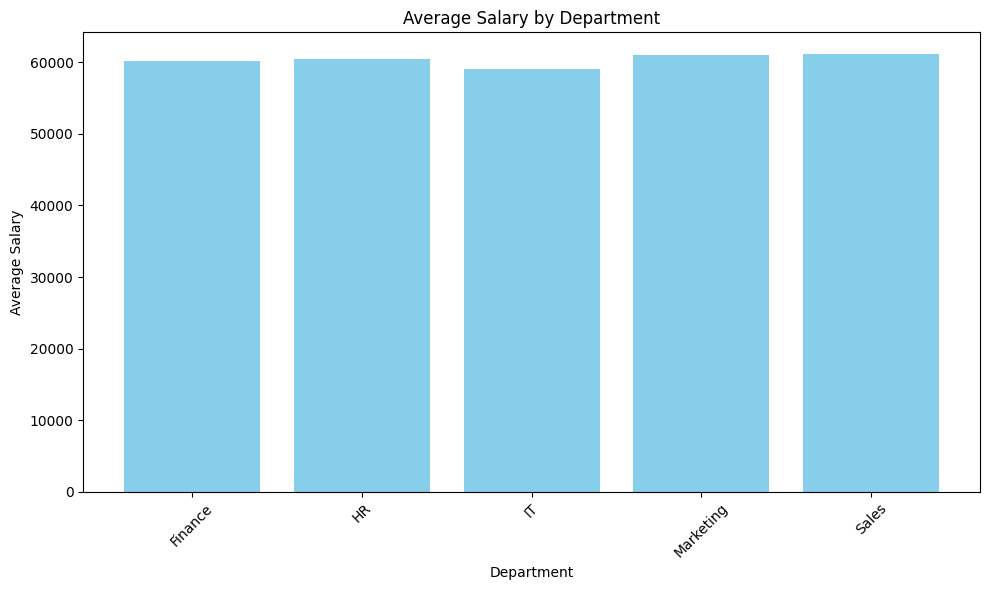

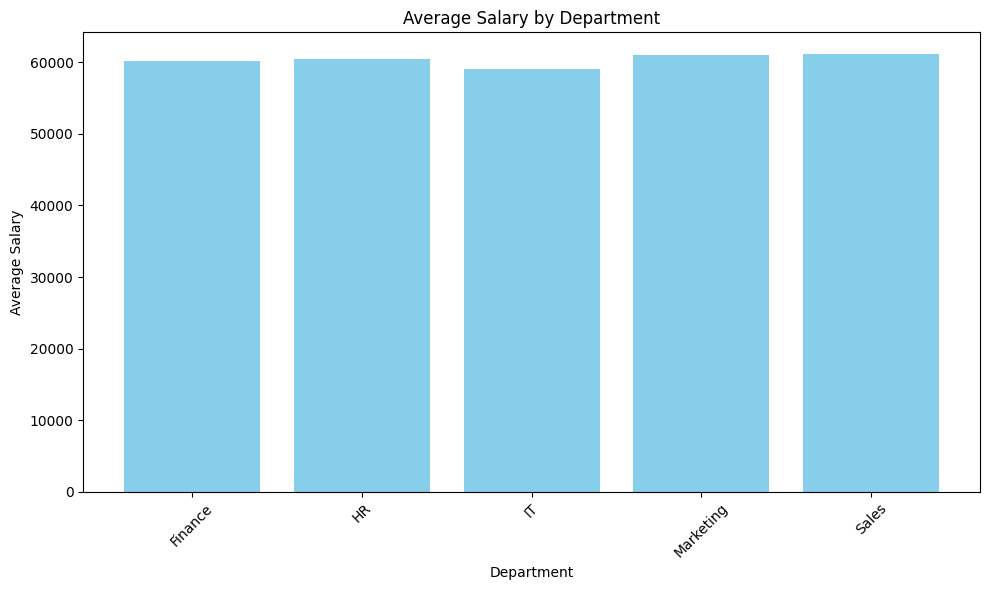

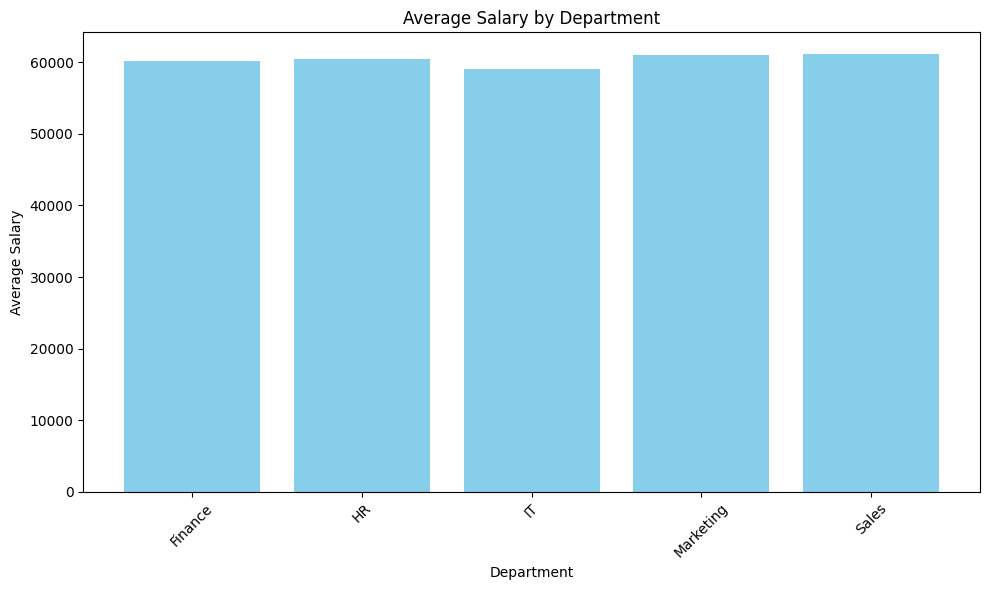

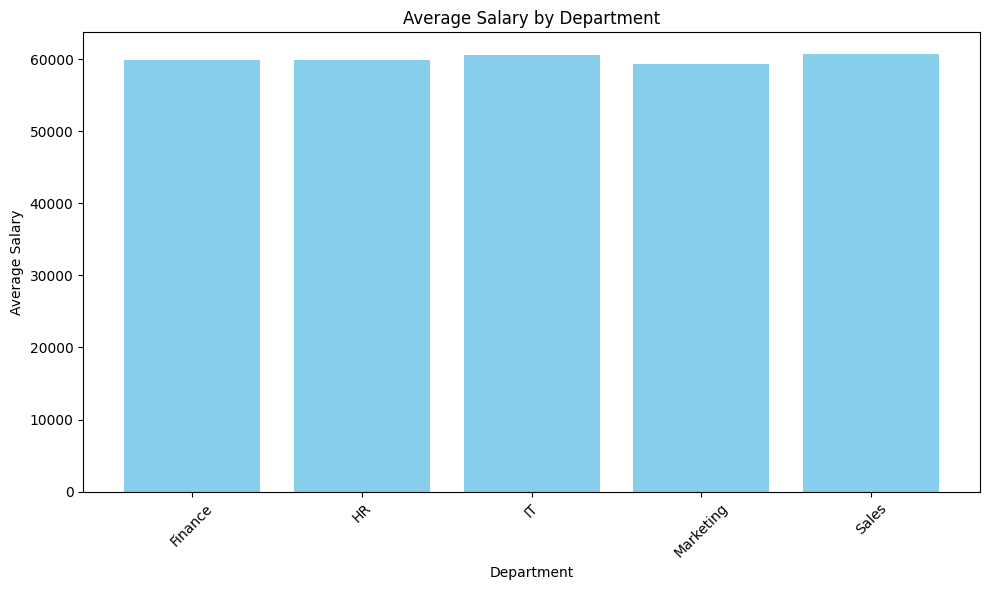

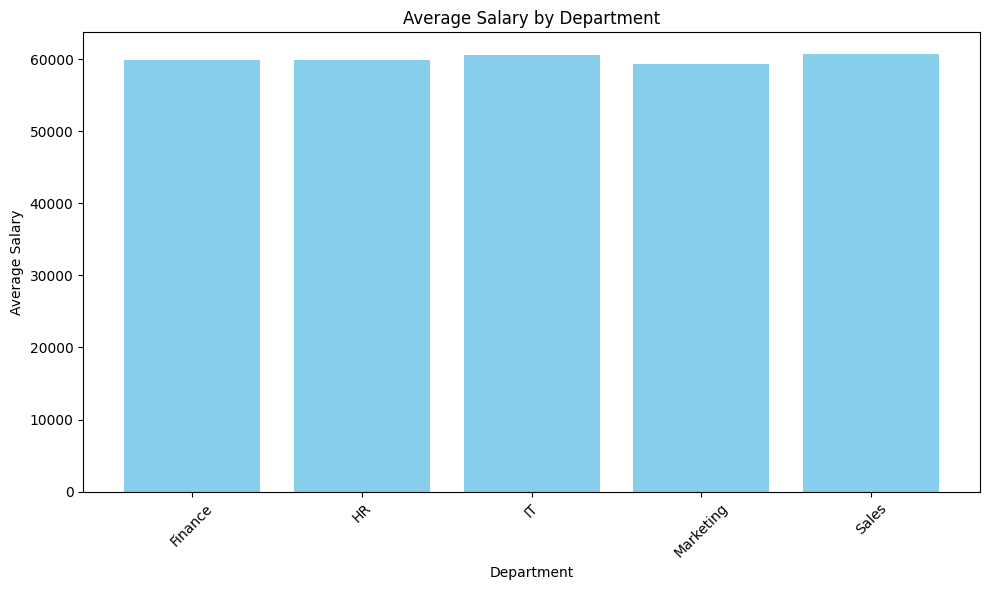

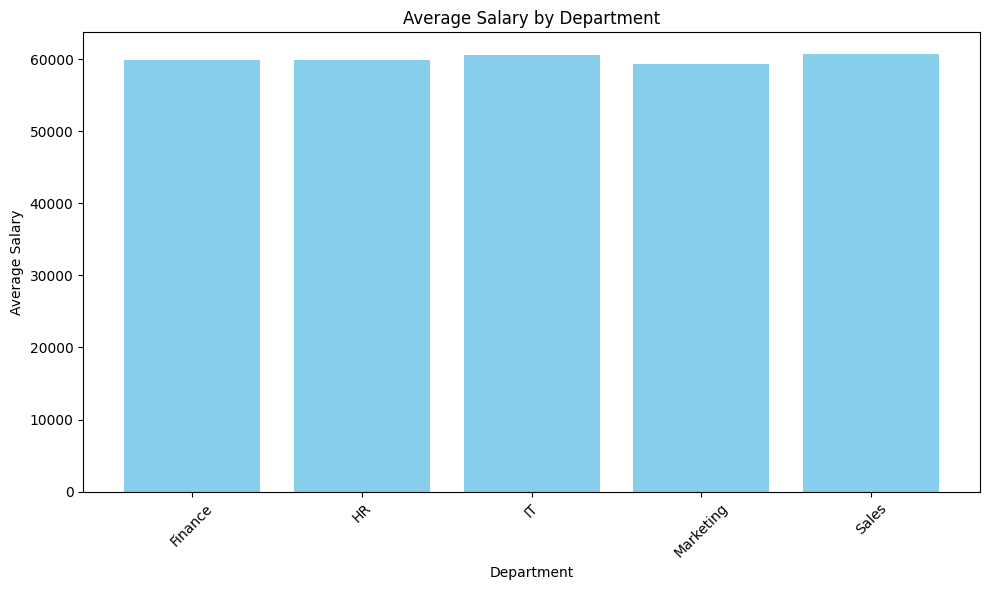

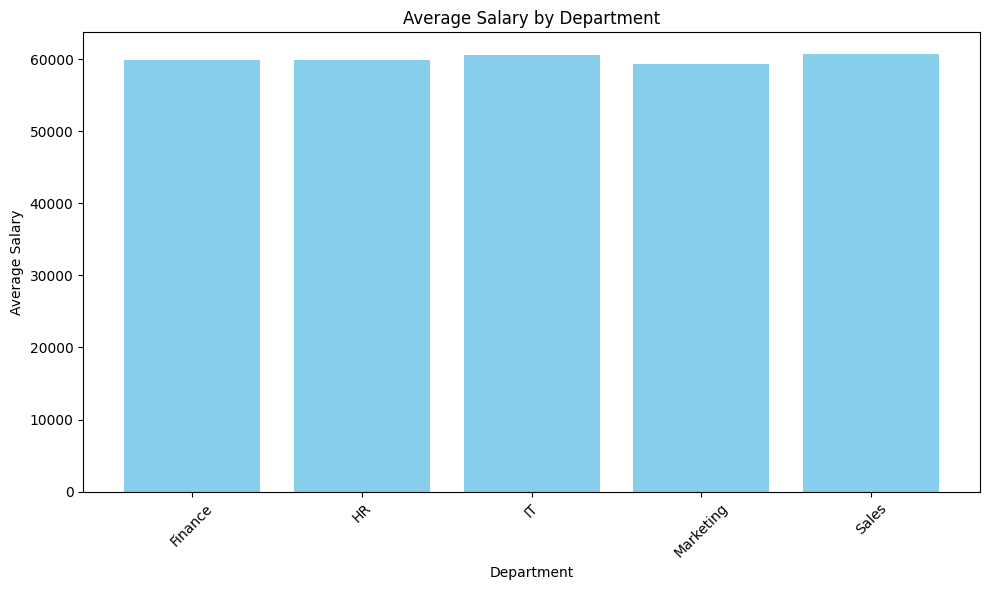

In [9]:
all_summaries = []

for i, chunk in enumerate(chunks):
    print(f"Processing chunk {i+1}/{len(chunks)} ...")
    summary = summarize_chunk(chunk)
    all_summaries.append(summary)


In [10]:
all_summaries

['Unfortunately, I was not able to answer your question, because of the following error:\n\nResult must be in the format of dictionary of type and value\n',
 "Unfortunately, I was not able to answer your question, because of the following error:\n\nValue type <class 'dict'> must match with type summary\n"]

# Step 6 — Aggregate Summaries
- After processing, you can combine insights manually or in code:
- You can also aggregate averages, totals, and plots in Pandas if needed.

In [ ]:
# Example: combining missing value counts
# (Assuming AI returned a dict per chunk)
all_missing_values = sum(chunk_missing_values for chunk in all_summaries)

# Step 7 — Generate Plots Safely
- Instead of returning full DataFrames, generate visualizations per chunk:
- AI produces charts, but never serializes the full dataset → recursion safe.

Plotting chunk 1


<string>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Plotting chunk 2


<string>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


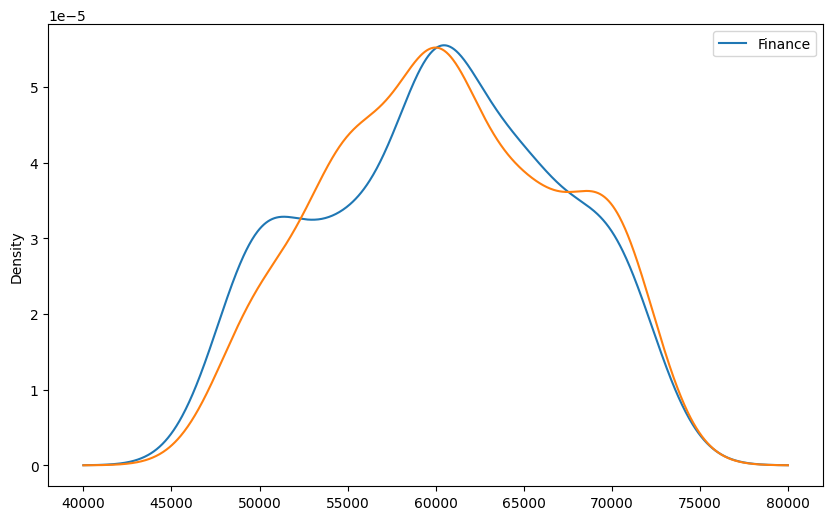

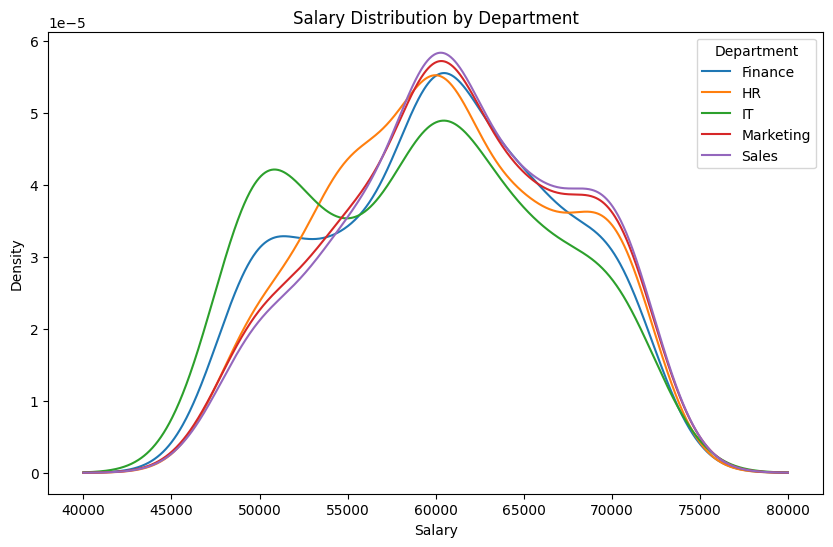

<Figure size 1000x600 with 0 Axes>

In [13]:
for i, chunk in enumerate(chunks):
    sdf = SmartDataframe(chunk, config={"llm": llm, "enable_cache": False})
    print(f"Plotting chunk {i+1}")
    sdf.chat("Plot Salary distribution by Department")


# Step 8 — Feature Engineering & Outlier 
- Chunking ensures no recursion error while still leveraging AI.

<string>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

        Name  Age        Salary  Gender Department   Position Joining Date  \
0      grace   25  50000.000000    Male         HR    Manager   2018-04-05   
1      david    0  65000.000000  Female    Finance   Director          NaT   
2     hannah   35  60000.000000  Female      Sales   Director          NaT   
3        eve    0  50000.000000  Female         IT    Manager   2018-04-05   
4      grace    0  60216.086435  Female    Finance    Manager          NaT   
..       ...  ...           ...     ...        ...        ...          ...   
495    alice   40  55000.000000   Other         IT      Clerk          NaT   
496    grace   25  70000.000000   Other         IT  Assistant          NaT   
497    grace   35  50000.000000   Other    Finance   Director   2018-04-05   
498      ivy   25  50000.000000  Female         IT  Assistant          NaT   
499  charlie   30  50000.000000  Female         HR    Manager          NaT   

     Performance Score                 Email  Phone Number  Ten

<string>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

       Name  Age   Salary  Gender Department   Position Joining Date  \
500     ivy    0  50000.0    Male      Sales  Assistant          NaT   
501   alice   30  50000.0   Other  Marketing    Analyst   2018-04-05   
502   alice   25  50000.0  Female      Sales    Analyst          NaT   
503   david   25  55000.0    Male    Finance   Director   2018-04-05   
504     ivy   40  65000.0    Male  Marketing  Assistant          NaT   
..      ...  ...      ...     ...        ...        ...          ...   
995    jack   50  65000.0  Female         HR    Manager          NaT   
996    jack   30  50000.0    Male    Finance    Analyst   2018-04-05   
997  hannah   30  70000.0    Male         IT  Assistant          NaT   
998     bob   25  65000.0   Other  Marketing    Manager   2018-04-05   
999     ivy   30  60000.0    Male    Finance    Manager          NaT   

     Performance Score                 Email  Phone Number  Tenure (Years)  \
500                NaN      name@company.org  123-456-789

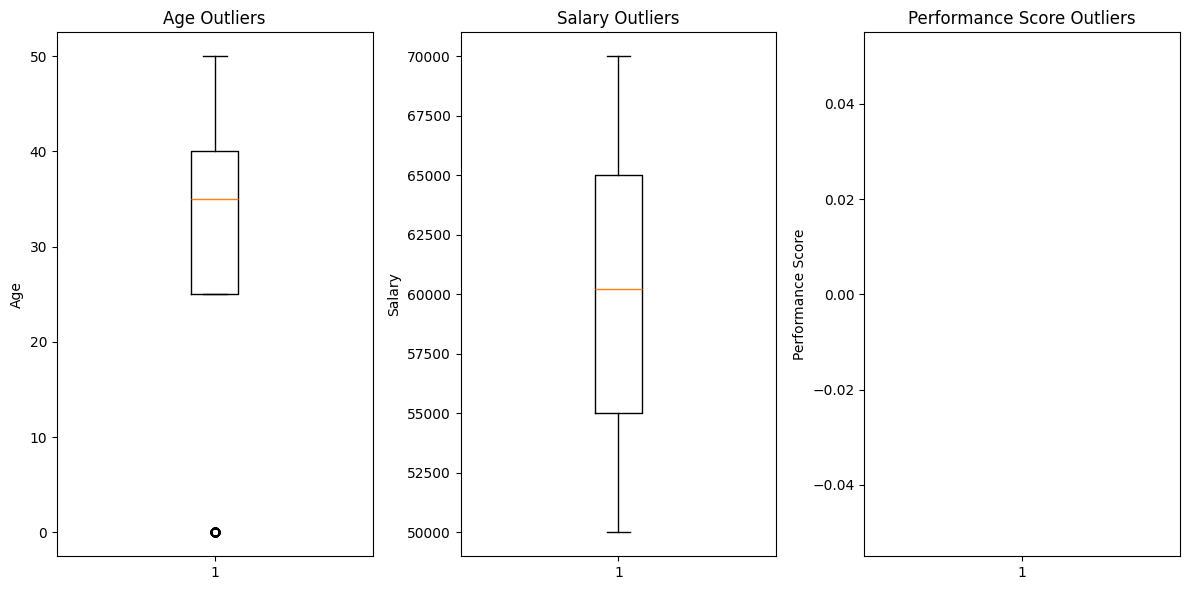

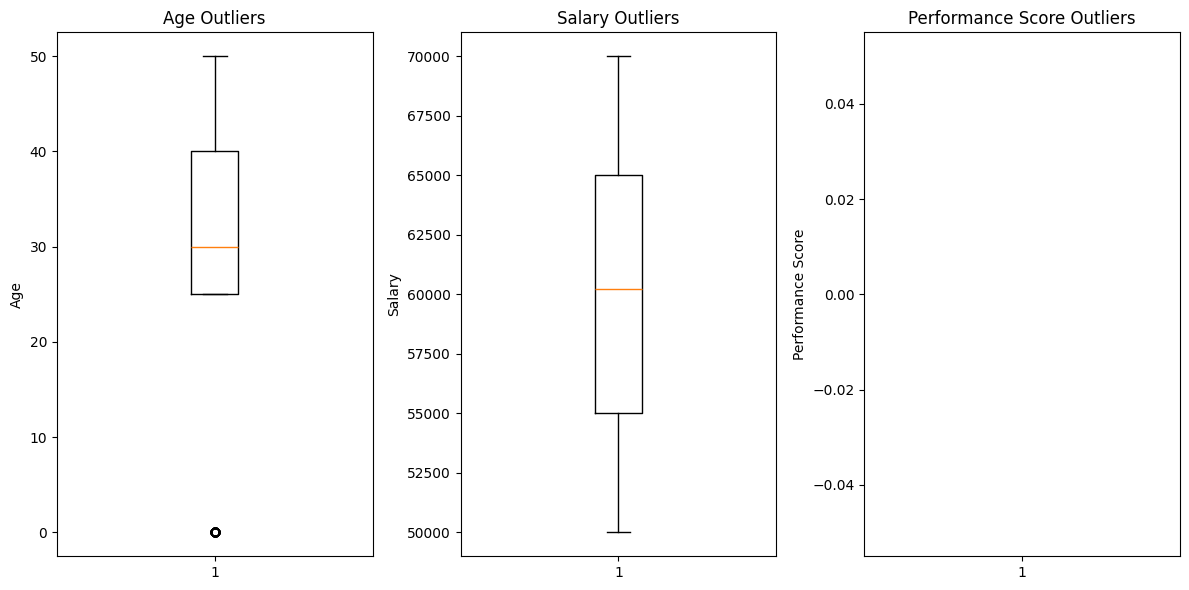

In [14]:
for chunk in chunks:
    sdf = SmartDataframe(chunk, config={"llm": llm, "enable_cache": False})
    # Suggest new features safely
    features = sdf.chat("""
    Suggest derived features for predicting Performance Score:
    - Tenure from Joining Date
    - Salary Bands
    - Other useful derived columns
    """)
    print(features)

    # Detect outliers safely
    outliers = sdf.chat("""
    Detect outliers in Age, Salary, Performance Score.
    Suggest strategies for handling them.
    """)
    print(outliers)


🔹 Why This Works
- Safe types → no TypeError.
- Chunking → avoids maximum recursion during serialization.
- Summaries, aggregates, plots → no full DataFrame return.
- Interactive AI prompts → still get rich insights.

✅ Benefits
- Works with datasets of any size.
- Generates EDA, cleaning suggestions, plots, and features.
- Avoids all previous TypeErrors and recursion errors.
- Fully AI-assisted workflow.